In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
# conda install -c conda-forge mlxtend


In [53]:
df = pd.read_csv(r"C:\Users\DELL\Desktop\bharath's file\DS\csv\Groceries_1.csv")
df.head()

,citrus fruit,semi-finished bread,margarine,ready soups,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31
0,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,whole milk,butter,yogurt,rice,abrasive cleaner,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
df1 = df.iloc[:, 0:4]
df1

,citrus fruit,semi-finished bread,margarine,ready soups
0,tropical fruit,yogurt,coffee,NaN
1,whole milk,NaN,NaN,NaN
2,pip fruit,yogurt,cream cheese,meat spreads
3,other vegetables,whole milk,condensed milk,long life bakery product
4,whole milk,butter,yogurt,rice
...,...,...,...,...
9829,sausage,chicken,beef,hamburger meat
9830,cooking chocolate,NaN,NaN,NaN
9831,chicken,citrus fruit,other vegetables,butter
9832,semi-finished bread,bottled water,soda,bottled beer


In [56]:
df2=pd.get_dummies(df1)
df2.head()

,citrus fruit_Instant food products,citrus fruit_UHT-milk,citrus fruit_abrasive cleaner,citrus fruit_artif. sweetener,citrus fruit_baby cosmetics,citrus fruit_bags,citrus fruit_baking powder,citrus fruit_bathroom cleaner,citrus fruit_beef,citrus fruit_berries,...,ready soups_tropical fruit,ready soups_turkey,ready soups_vinegar,ready soups_waffles,ready soups_whipped/sour cream,ready soups_white bread,ready soups_white wine,ready soups_whole milk,ready soups_yogurt,ready soups_zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# for min support = 0.01

In [59]:
frequent_itemsets = apriori(df2, min_support=0.01, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.030913,(citrus fruit_beef)
1,0.012304,(citrus fruit_berries)
2,0.018100,(citrus fruit_bottled beer)
3,0.017287,(citrus fruit_bottled water)
4,0.031523,(citrus fruit_canned beer)
...,...,...
67,0.010067,"(citrus fruit_frankfurter, semi-finished bread..."
68,0.014033,"(semi-finished bread_whole milk, citrus fruit_..."
69,0.018304,"(semi-finished bread_other vegetables, margari..."
70,0.012508,"(margarine_other vegetables, semi-finished bre..."


In [62]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.2)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(citrus fruit_citrus fruit),(semi-finished bread_tropical fruit),0.045963,0.036099,0.011592,0.252212,6.986638,0.009933,1.289003
1,(semi-finished bread_tropical fruit),(citrus fruit_citrus fruit),0.036099,0.045963,0.011592,0.321127,6.986638,0.009933,1.405324
2,(semi-finished bread_sausage),(citrus fruit_frankfurter),0.010067,0.058979,0.010067,1.000000,16.955172,0.009473,inf
3,(semi-finished bread_whole milk),(citrus fruit_other vegetables),0.066504,0.046776,0.014033,0.211009,4.511009,0.010922,1.208155
4,(citrus fruit_other vegetables),(semi-finished bread_whole milk),0.046776,0.066504,0.014033,0.300000,4.511009,0.010922,1.333566
5,(semi-finished bread_other vegetables),(margarine_whole milk),0.055928,0.051454,0.018304,0.327273,6.360474,0.015426,1.410001
6,(margarine_whole milk),(semi-finished bread_other vegetables),0.051454,0.055928,0.018304,0.355731,6.360474,0.015426,1.465338
7,(margarine_other vegetables),(semi-finished bread_root vegetables),0.042201,0.038947,0.012508,0.296386,7.610066,0.010864,1.365881
8,(semi-finished bread_root vegetables),(margarine_other vegetables),0.038947,0.042201,0.012508,0.321149,7.610066,0.010864,1.410912
9,(ready soups_whole milk),(margarine_other vegetables),0.032032,0.042201,0.017287,0.539683,12.788526,0.015935,2.080737


In [63]:
rules.sort_values('lift',ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(semi-finished bread_sausage),(citrus fruit_frankfurter),0.010067,0.058979,0.010067,1.000000,16.955172,0.009473,inf
9,(ready soups_whole milk),(margarine_other vegetables),0.032032,0.042201,0.017287,0.539683,12.788526,0.015935,2.080737
10,(margarine_other vegetables),(ready soups_whole milk),0.042201,0.032032,0.017287,0.409639,12.788526,0.015935,1.639620
8,(semi-finished bread_root vegetables),(margarine_other vegetables),0.038947,0.042201,0.012508,0.321149,7.610066,0.010864,1.410912
7,(margarine_other vegetables),(semi-finished bread_root vegetables),0.042201,0.038947,0.012508,0.296386,7.610066,0.010864,1.365881
0,(citrus fruit_citrus fruit),(semi-finished bread_tropical fruit),0.045963,0.036099,0.011592,0.252212,6.986638,0.009933,1.289003
1,(semi-finished bread_tropical fruit),(citrus fruit_citrus fruit),0.036099,0.045963,0.011592,0.321127,6.986638,0.009933,1.405324
6,(margarine_whole milk),(semi-finished bread_other vegetables),0.051454,0.055928,0.018304,0.355731,6.360474,0.015426,1.465338
5,(semi-finished bread_other vegetables),(margarine_whole milk),0.055928,0.051454,0.018304,0.327273,6.360474,0.015426,1.410001
3,(semi-finished bread_whole milk),(citrus fruit_other vegetables),0.066504,0.046776,0.014033,0.211009,4.511009,0.010922,1.208155


In [64]:
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(citrus fruit_citrus fruit),(semi-finished bread_tropical fruit),0.045963,0.036099,0.011592,0.252212,6.986638,0.009933,1.289003
1,(semi-finished bread_tropical fruit),(citrus fruit_citrus fruit),0.036099,0.045963,0.011592,0.321127,6.986638,0.009933,1.405324
2,(semi-finished bread_sausage),(citrus fruit_frankfurter),0.010067,0.058979,0.010067,1.000000,16.955172,0.009473,inf
3,(semi-finished bread_whole milk),(citrus fruit_other vegetables),0.066504,0.046776,0.014033,0.211009,4.511009,0.010922,1.208155
4,(citrus fruit_other vegetables),(semi-finished bread_whole milk),0.046776,0.066504,0.014033,0.300000,4.511009,0.010922,1.333566
5,(semi-finished bread_other vegetables),(margarine_whole milk),0.055928,0.051454,0.018304,0.327273,6.360474,0.015426,1.410001
6,(margarine_whole milk),(semi-finished bread_other vegetables),0.051454,0.055928,0.018304,0.355731,6.360474,0.015426,1.465338
7,(margarine_other vegetables),(semi-finished bread_root vegetables),0.042201,0.038947,0.012508,0.296386,7.610066,0.010864,1.365881
8,(semi-finished bread_root vegetables),(margarine_other vegetables),0.038947,0.042201,0.012508,0.321149,7.610066,0.010864,1.410912
9,(ready soups_whole milk),(margarine_other vegetables),0.032032,0.042201,0.017287,0.539683,12.788526,0.015935,2.080737


In [65]:
import matplotlib.pyplot as plt


Bad key "text.kerning_factor" on line 4 in
C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


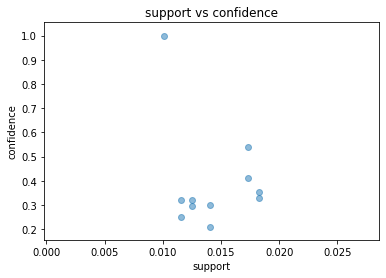

In [66]:
# support vs confidence
plt.scatter (rules['support'],rules['confidence'], alpha = 0.5)
plt.xlabel ('support')
plt.ylabel('confidence')
plt.title('support vs confidence')
plt.show()

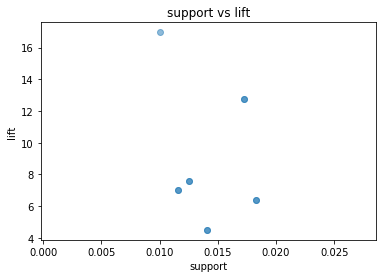

In [67]:
# support vs lift
plt.scatter (rules['support'],rules['lift'], alpha = 0.5)
plt.xlabel ('support')
plt.ylabel('lift')
plt.title('support vs lift')
plt.show()

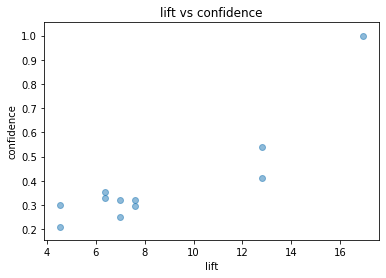

In [68]:
# lift vs confidence
plt.scatter (rules['lift'],rules['confidence'], alpha = 0.5)
plt.xlabel ('lift')
plt.ylabel('confidence')
plt.title('lift vs confidence')
plt.show()

C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


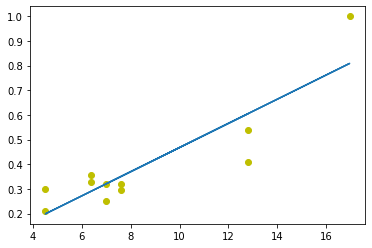

In [69]:
import numpy as np
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'],rules['confidence'], 'yo', rules['lift'], fit_fn(rules['lift']))